In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
import pandas as pd
df=pd.read_csv('/Users/xiaoxuchen/Downloads/DS_interview/DS_project/Python_scrap/final_condo_data.csv',index_col=[0])
df.head()

,MLS_number_condo,condo_price,maint_fee,avg_income_household_yr,avg_income_individual_yr,total_sqft,price_per_sqft,street,toronto_region,bedrooms,...,tenancy_property_type_low_rise,tenancy_property_type_high_rise,household_compo_singlefamily,household_compo_multifamily,household_compo_singleperson,household_compo_multiperson,brokerages,single_condo_url,latitude,longitude
0,C5608721,980000,$647.31,125204,64764,700 - 799 sqft,"$1,227 - $1,400",4708 - 125 Blue Jays Way,Downtown,2,...,1,98,29%,0%,59%,12%,"AIMHOME NEW TIMES REALTY,",https://condos.ca/toronto/king-blue-115-125-bl...,43.645941,-79.392054
1,C5608680,699800,$657.88,67850,29821,NaN,$813,1103 - 62 Forest Manor Rd,North York,2,...,0,92,61%,2%,27%,10%,"RIGHT AT HOME REALTY,",https://condos.ca/toronto/dream-tower-at-emera...,43.773944,-79.345246
2,C5608587,960000,$832.53,142425,63489,NaN,"$1,061",2008 - 35 Balmuto St,Downtown,2+1,...,3,96,33%,0%,54%,12%,"ROYAL LEPAGE GOLDEN RIDGE REALTY,",https://condos.ca/toronto/uptown-residences-35...,43.669472,-79.387488
3,C5608686,698800,$344.65,108578,60024,NaN,"$1,099",1111 - 111 Bathurst St,Downtown,1,...,15,76,35%,1%,56%,9%,"RE/MAX HALLMARK REALTY LTD.,",https://condos.ca/toronto/oneeleven-condos-111...,43.645108,-79.402790
4,W5608672,389900,$569.67,62102,27414,800 - 899 sqft,$434 - $487,2502 330 Dixon Rd,Etobicoke,2,...,0,90,66%,4%,23%,7%,"RE/MAX WEST REALTY INC.,",https://condos.ca/toronto/320-dixon-condos-320...,43.695785,-79.553155


# 1. Data structure

missing values for below column:
* maint_fee
* total_sqft
* price_per_sqft
* toronto_region
* soeak_english

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3160 entries, 0 to 3159
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MLS_number_condo                     3160 non-null   object 
 1   condo_price                          3160 non-null   int64  
 2   maint_fee                            3031 non-null   object 
 3   avg_income_household_yr              3160 non-null   int64  
 4   avg_income_individual_yr             3160 non-null   int64  
 5   total_sqft                           874 non-null    object 
 6   price_per_sqft                       3068 non-null   object 
 7   street                               3160 non-null   object 
 8   toronto_region                       3143 non-null   object 
 9   bedrooms                             3160 non-null   object 
 10  bath                                 3160 non-null   int64  
 11  parking                       

as shown below,31 numeric features and 19 categorical features

In [4]:
df.describe()

,condo_price,avg_income_household_yr,avg_income_individual_yr,bath,parking,near_by_schools,speak_English,speak_Europe_language,speak_Asian_language,speak_Africa_language,...,population_65_and_more,tenancy_property_type_owned,tenancy_property_type_rented,tenancy_property_type_detached,tenancy_property_type_semi_detached,tenancy_property_type_duplex,tenancy_property_type_low_rise,tenancy_property_type_high_rise,latitude,longitude
count,3.160000e+03,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3144.000000,3160.000000,3160.000000,3160.000000,...,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,1.003836e+06,108823.673418,50159.051582,1.734177,0.915823,1.000633,52.518448,9.143987,18.060443,0.369304,...,13.298101,51.336076,48.038608,8.213924,2.458544,1.711076,9.269937,72.622468,43.694582,-79.395635
std,1.047225e+06,53354.910937,21669.760622,0.850434,0.642390,1.255315,16.608162,8.274139,16.226275,2.558342,...,7.126212,18.088726,18.289755,14.017393,5.348878,3.001804,12.300922,28.589444,0.056645,0.077609
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.593453,-79.620766
25%,6.589500e+05,75478.250000,33660.000000,1.000000,1.000000,0.000000,39.000000,4.000000,6.000000,0.000000,...,9.000000,37.000000,34.000000,0.000000,0.000000,0.000000,1.000000,59.000000,43.646427,-79.420455
50%,7.888880e+05,97563.500000,47095.000000,2.000000,1.000000,1.000000,56.000000,8.000000,12.000000,0.000000,...,12.000000,51.000000,49.000000,2.000000,0.000000,1.000000,4.000000,84.000000,43.670577,-79.391671
75%,9.988250e+05,122321.000000,60140.000000,2.000000,1.000000,1.000000,65.000000,11.000000,26.000000,0.000000,...,16.000000,65.000000,63.000000,10.000000,2.000000,2.000000,12.000000,95.000000,43.749918,-79.369282
max,3.470000e+07,631792.000000,241765.000000,11.000000,4.000000,7.000000,90.000000,57.000000,76.000000,26.000000,...,58.000000,97.000000,92.000000,100.000000,55.000000,27.000000,80.000000,100.000000,43.825977,-79.135396


In [5]:
df.dtypes[df.dtypes=='object']

MLS_number_condo                object
maint_fee                       object
total_sqft                      object
price_per_sqft                  object
street                          object
toronto_region                  object
bedrooms                        object
age_of_building                 object
commute_transit                 object
commute_car                     object
near_by_grocery_stores          object
near_by_bars&restaurants        object
household_compo_singlefamily    object
household_compo_multifamily     object
household_compo_singleperson    object
household_compo_multiperson     object
brokerages                      object
single_condo_url                object
dtype: object

# 2.Distributions of 31 numeric features

* for average income per household, over 2000 households' income less than 200,000
* for average income per individual, over 1500 individuals' income less than 100,000
* over 1000, i.e., more than 33% condos have 1 school nearby

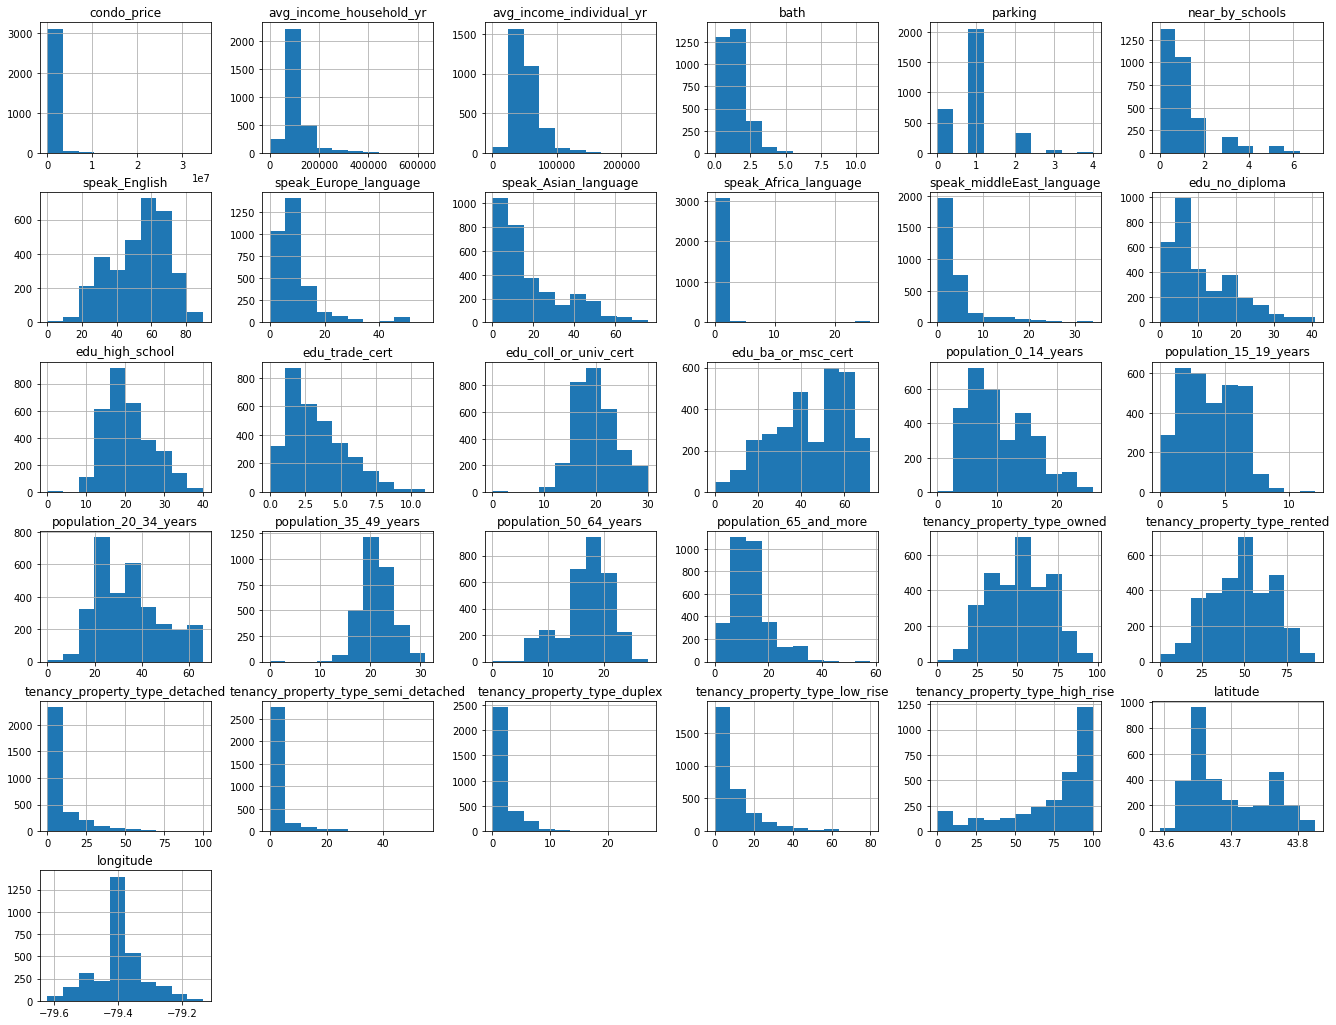

In [12]:
df.hist(figsize=(23,18))

plt.show()

# 3.Distributions of 19 categorical features

In [14]:
df.describe(include=['object'])

,MLS_number_condo,maint_fee,total_sqft,price_per_sqft,street,toronto_region,bedrooms,age_of_building,commute_transit,commute_car,near_by_grocery_stores,near_by_bars&restaurants,household_compo_singlefamily,household_compo_multifamily,household_compo_singleperson,household_compo_multiperson,brokerages,single_condo_url
count,3160,3031,874,3068,3160,3143,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160
unique,3160,2651,31,1598,3157,9,19,64,50,69,18,102,59,17,59,23,526,3160
top,C5544229,$0.00,1000 - 1199 sqft,"$1,108",305 - 38 Elm St,Downtown,2,-,26%,19%,2 stores,94 & Restaurants,38%,0%,56%,5%,"ROYAL LEPAGE SIGNATURE REALTY,",https://condos.ca/toronto/mondeo-townhomes-83-...
freq,1,42,112,9,2,1163,914,254,213,111,489,238,167,1423,211,453,93,1


from categorical features, below needs to be done via data cleaning
* remove dollar sign from maint_fee and fillin missing value for maint_fee
* remove hyphen and text from total_sqft, and then calculate the average total_sqft for each condo
* remove dollar sign and comma from price_per_sqft
* fillin toronto_region missing values
* remove percent from commute columns and household columns
* remove text from nearby columns


## 3.1 Bar plots for categorical features

### 3.1.1 total_sqft

for total_sqft: 1000-1199 sqft has the most counts than other types of sqft, and most condos' total sqft are in range from 600 to 1199 sqft

<AxesSubplot:xlabel='count', ylabel='total_sqft'>

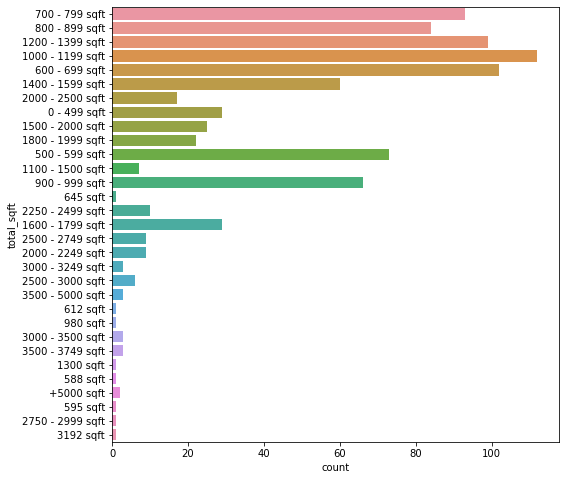

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(y='total_sqft', data=df)

### 3.1.2 bedrooms

most of condos in dataset have 2 bedrooms, and considering '+' sign in the column, the bedroom plus value will be moved to a separate column 

<AxesSubplot:xlabel='count', ylabel='bedrooms'>

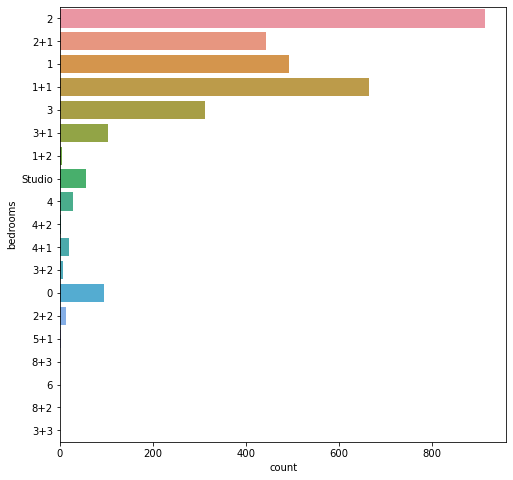

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(y='bedrooms', data=df)

### 3.1.3 age_of_building

there are about 250 condos not have age of building, these missing values needs to be handled in data cleaning

<AxesSubplot:xlabel='count', ylabel='age_of_building'>

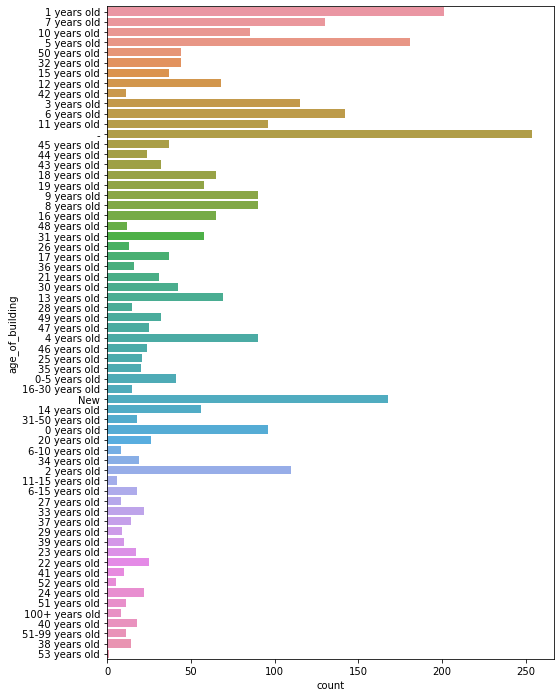

In [22]:
plt.figure(figsize=(8,12))
sns.countplot(y='age_of_building', data=df)

* total_sqft needs to fillin missing values
* age_of_building needs to replace '-' value

# 4. Correlations between numeric features

In [23]:
df.corr()

,condo_price,avg_income_household_yr,avg_income_individual_yr,bath,parking,near_by_schools,speak_English,speak_Europe_language,speak_Asian_language,speak_Africa_language,...,population_65_and_more,tenancy_property_type_owned,tenancy_property_type_rented,tenancy_property_type_detached,tenancy_property_type_semi_detached,tenancy_property_type_duplex,tenancy_property_type_low_rise,tenancy_property_type_high_rise,latitude,longitude
condo_price,1.000000,0.332987,0.312583,0.490195,0.301901,0.114061,0.158809,-0.024541,-0.109435,-0.060401,...,0.122223,-0.072088,0.074430,-0.001837,0.017716,-0.024751,0.030777,0.004130,-0.114731,-0.003135
avg_income_household_yr,0.332987,1.000000,0.959170,0.119156,0.058278,0.306381,0.493377,0.004496,-0.384211,-0.106414,...,0.348886,0.083056,-0.053709,0.092469,0.020541,-0.109751,0.064915,-0.007519,-0.317313,-0.089902
avg_income_individual_yr,0.312583,0.959170,1.000000,0.062019,-0.000529,0.325920,0.550488,0.011976,-0.448848,-0.128384,...,0.216049,0.099091,-0.061222,-0.032851,-0.086665,-0.227238,-0.015477,0.149357,-0.450315,-0.115937
bath,0.490195,0.119156,0.062019,1.000000,0.552378,0.016170,-0.004164,0.012774,0.030023,-0.035033,...,0.180854,0.067769,-0.066704,0.198940,0.138079,0.147600,0.096311,-0.215544,0.093600,0.011595
parking,0.301901,0.058278,-0.000529,0.552378,1.000000,-0.058817,-0.132075,0.010798,0.117804,0.024507,...,0.244743,0.216641,-0.212922,0.229592,0.102075,0.150231,-0.011505,-0.194123,0.218772,-0.003983
near_by_schools,0.114061,0.306381,0.325920,0.016170,-0.058817,1.000000,0.181151,-0.111372,-0.085120,-0.032600,...,-0.040751,-0.051409,0.067531,-0.138117,-0.014752,-0.110001,0.062392,0.104282,-0.160342,0.030607
speak_English,0.158809,0.493377,0.550488,-0.004164,-0.132075,0.181151,1.000000,0.122675,-0.795020,-0.099913,...,-0.063072,-0.159407,0.201954,-0.026772,0.017430,0.028132,0.247277,-0.045591,-0.649722,-0.064611
speak_Europe_language,-0.024541,0.004496,0.011976,0.012774,0.010798,-0.111372,0.122675,1.000000,-0.461465,-0.054360,...,0.124185,0.043084,-0.028213,0.301350,0.157525,0.128923,0.386416,-0.326421,-0.223148,-0.496253
speak_Asian_language,-0.109435,-0.384211,-0.448848,0.030023,0.117804,-0.085120,-0.795020,-0.461465,1.000000,-0.015820,...,0.012752,0.199832,-0.191599,-0.000094,0.012063,0.059779,-0.258712,0.056509,0.679728,0.408126
speak_Africa_language,-0.060401,-0.106414,-0.128384,-0.035033,0.024507,-0.032600,-0.099913,-0.054360,-0.015820,1.000000,...,0.022158,-0.039218,0.036336,0.019061,-0.028248,0.003470,-0.048484,0.012593,-0.001980,-0.241054


Dark blue colors indicate strong positive correlations and light yellow colors indicate strong negative correlations.

<AxesSubplot:>

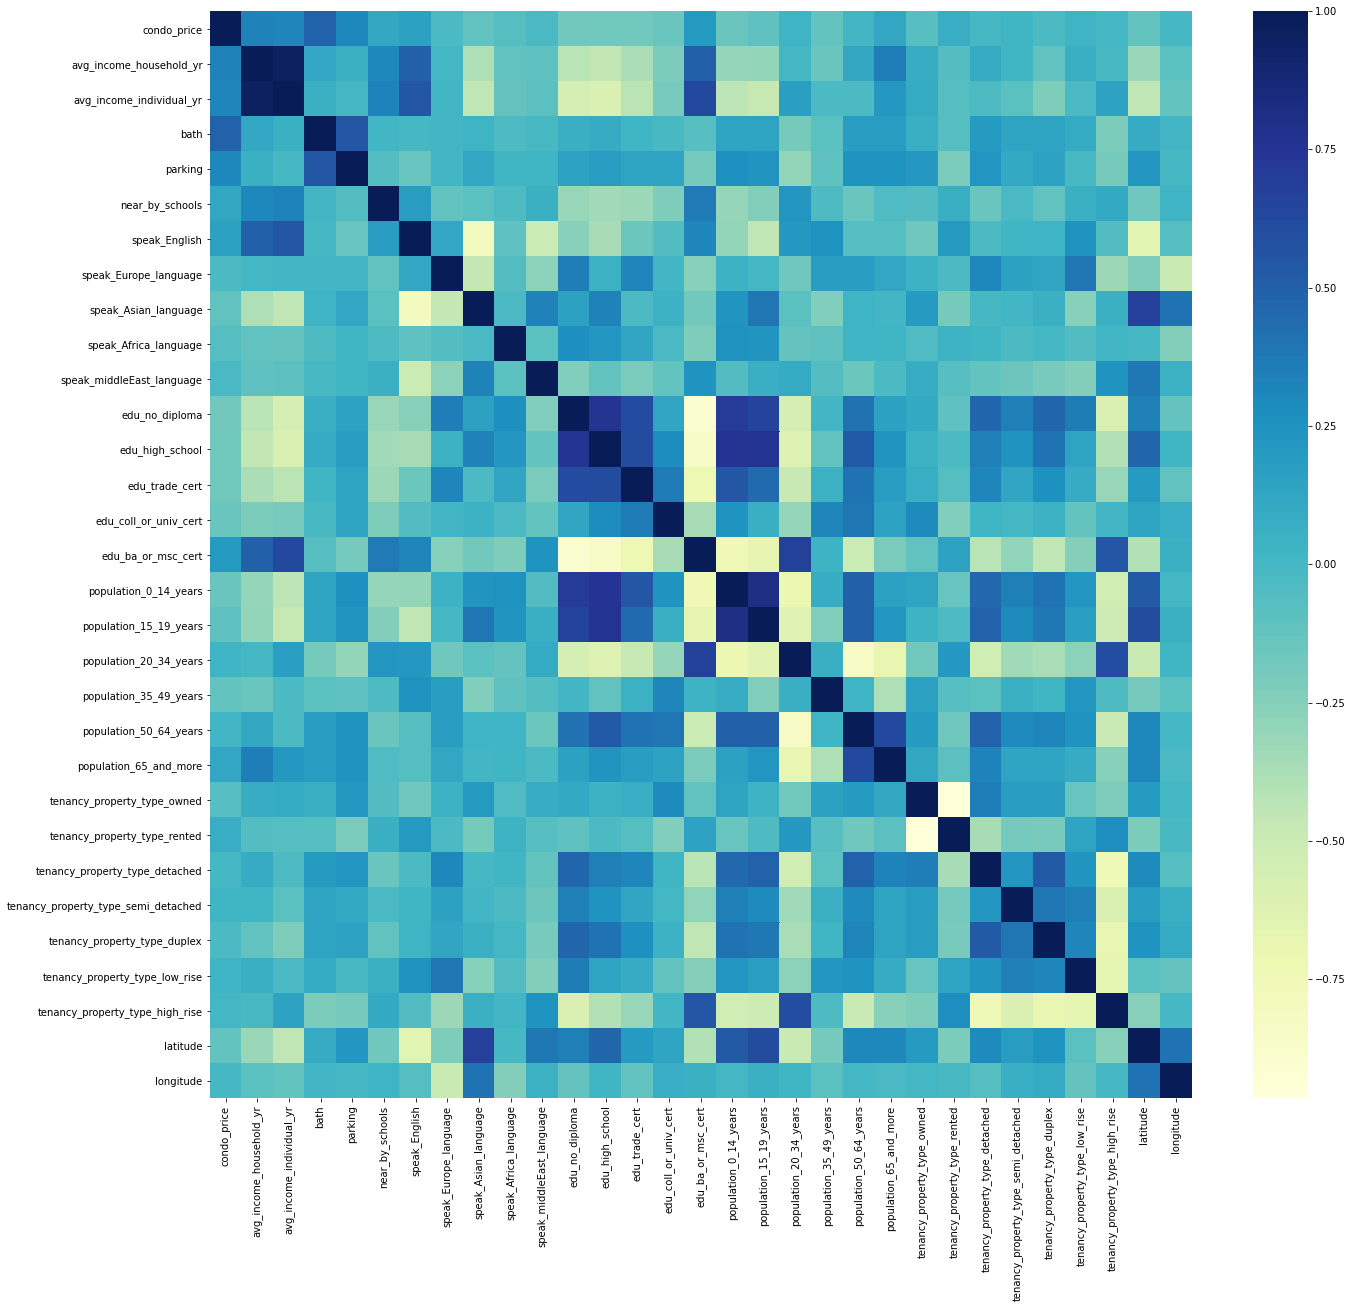

In [28]:
plt.figure(figsize=(22,20))
sns.heatmap(df.corr(),cmap="YlGnBu")

`to make the heatmap more clear, as shown below, the condo_price is more more related to household income,individual income, nearby schools, bath, parking, education background from bachelor and postgraduate degree, people who speak english, and population age>65; for the negative correlation: those education background lower than bachelor degree, those who speak other language except English and those population less than 19 years old`

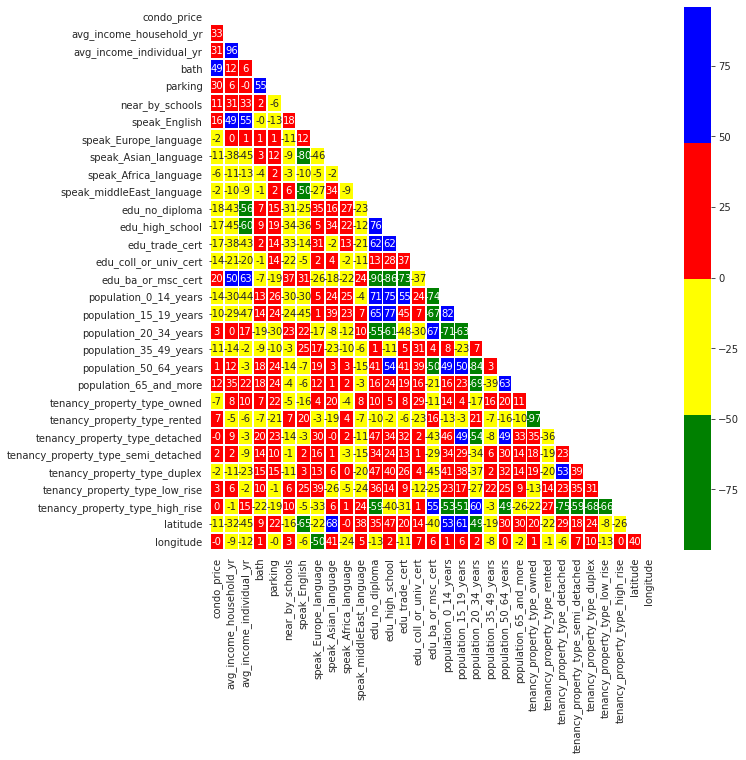

In [30]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# 5. Relationship between categorical and numeric features

### 5.1 toronto region and condo price

it looks like Downtown condo's price are more expensive than other regions, and the prices are also more sparse

<AxesSubplot:xlabel='condo_price', ylabel='toronto_region'>

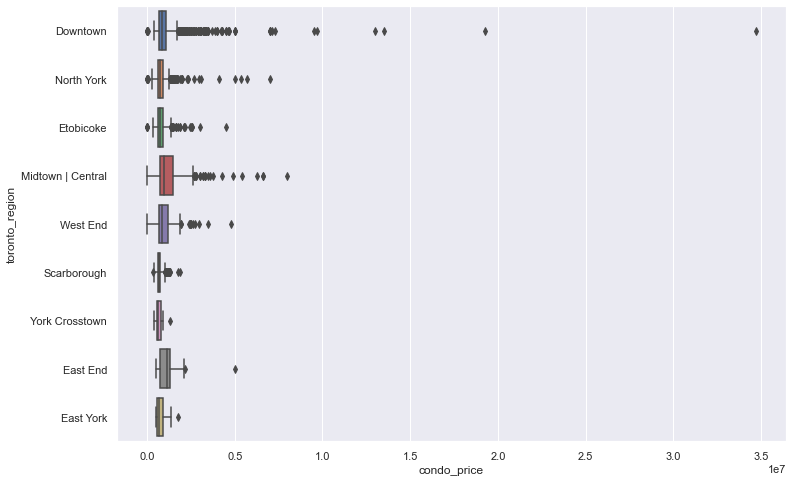

In [41]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.boxplot(y='toronto_region', x='condo_price', data=df)

* Midtown and East End average condo price are higher than other regions, Scarborough has the lowest average condo price. same as the household and individual income.
* Midtown has most average nearby schools, york crosstown has the lowest.
* East end and midtown, most people speak English, while North york has the lowest percentage of people speak english

In [52]:
df.groupby('toronto_region').mean()


,condo_price,avg_income_household_yr,avg_income_individual_yr,bath,parking,near_by_schools,speak_English,speak_Europe_language,speak_Asian_language,speak_Africa_language,...,population_65_and_more,tenancy_property_type_owned,tenancy_property_type_rented,tenancy_property_type_detached,tenancy_property_type_semi_detached,tenancy_property_type_duplex,tenancy_property_type_low_rise,tenancy_property_type_high_rise,latitude,longitude
toronto_region,,,,,,,,,,,,,,,,,,,,,
Downtown,1.176566e+06,121085.866724,58339.721410,1.595873,0.658641,1.319003,60.509957,7.379192,13.555460,0.098882,...,9.716251,42.947549,56.959587,0.224420,0.563199,0.447979,6.302666,90.049871,43.652848,-79.385337
East End,1.206901e+06,123899.928571,53345.595238,2.119048,1.000000,1.095238,74.785714,6.000000,8.642857,0.000000,...,12.023810,56.880952,42.761905,12.857143,16.738095,4.785714,31.333333,24.690476,43.670733,-79.323312
East York,7.974346e+05,106246.384615,47591.692308,1.538462,0.846154,0.884615,56.730769,5.000000,19.346154,0.038462,...,13.500000,47.730769,52.038462,18.346154,6.230769,1.576923,22.153846,49.153846,43.701741,-79.332594
Etobicoke,8.338043e+05,110272.310096,51260.389423,1.754808,1.149038,0.588942,52.423077,13.615385,8.862981,2.163462,...,14.555288,62.608173,36.879808,12.230769,1.247596,1.634615,6.502404,73.093750,43.651554,-79.521876
Midtown | Central,1.316843e+06,176704.502183,73764.445415,1.812227,0.890830,2.165939,68.751092,9.043668,5.340611,0.021834,...,20.144105,35.930131,63.860262,9.043668,3.882096,1.698690,15.545852,67.401747,43.695775,-79.399266
North York,8.537437e+05,91719.221898,41452.315328,1.792701,1.077372,0.756204,36.226471,11.662774,26.849635,0.127007,...,16.084672,56.769343,42.674453,14.115328,3.475912,1.705109,10.991241,62.894891,43.757138,-79.406628
Scarborough,7.113031e+05,69906.321519,29866.881013,1.878481,1.174684,0.460759,41.727041,2.422785,39.881013,0.022785,...,15.227848,63.896203,35.017722,16.283544,3.506329,4.232911,4.556962,58.248101,43.774521,-79.258277
West End,1.032439e+06,99449.811688,47503.616883,1.844156,0.831169,0.701299,63.603896,15.610390,6.344156,0.000000,...,10.149351,56.103896,43.688312,5.493506,6.116883,3.519481,25.389610,51.902597,43.648384,-79.442646
York Crosstown,6.898992e+05,69865.212121,32710.727273,1.787879,1.090909,0.272727,50.757576,22.787879,9.212121,1.515152,...,14.212121,41.848485,56.878788,17.333333,4.030303,3.666667,15.121212,54.424242,43.694633,-79.492172


### 5.2 bedrooms

for condo price less than 1e7, the bedrooms number less than 2. for condo price 3.5e7, has outlier bedrooms 5+1

<AxesSubplot:xlabel='condo_price', ylabel='bedrooms'>

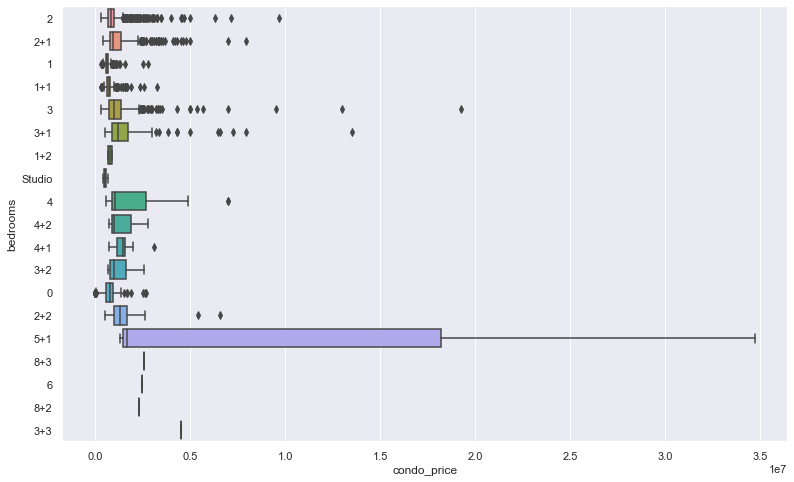

In [40]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.boxplot(y='bedrooms', x='condo_price', data=df)

higher household/individual income tends to purchase 3 bedrooms

In [60]:
df.groupby('bedrooms').agg([np.mean, np.std])

condo_price               avg_income_household_yr                 \
                  mean           std                    mean            std   
bedrooms                                                                      
0         7.518193e+05  5.660830e+05           105944.663158   48119.106709   
1         6.670480e+05  1.787960e+05           110248.136179   41006.755029   
1+1       7.583143e+05  2.145319e+05           111154.195489   47881.402375   
1+2       7.911176e+05  9.581308e+04            95464.800000   15443.441365   
2         1.002467e+06  6.587313e+05           108718.443107   58990.117859   
2+1       1.227990e+06  8.506239e+05           112748.031674   62238.243626   
2+2       1.991192e+06  1.870279e+06           117841.153846   71563.742364   
3         1.342948e+06  1.557281e+06            98326.644231   52918.523854   
3+1       1.788608e+06  1.811368e+06           104552.106796   52586.401588   
3+2       1.303833e+06  7.272418e+05           103020.166667   58866.380709   
3+3       4.500000e+06           NaN           152910.000000            NaN   
4         2.023270e+06  1.866704e+06           105300.035714   53336.863370   
4+1       1.428644e+06  5.187998e+05            90933.550000   29268.969395   
4+2       1.518667e+06  1.115222e+06           170028.666667  167619.768409   
5+1       1.255328e+07  1.918047e+07           104574.333333   39531.172931   
6         2.449999e+06           NaN            96785.000000            NaN   
8+2       2.288800e+06           NaN            72572.000000            NaN   
8+3       2.600000e+06           NaN            85716.000000            NaN   
Studio    5.279167e+05  6.572453e+04           116038.745455   38811.133512   

         avg_income_individual_yr                     bath            \
                             mean           std       mean       std   
bedrooms                                                               
0                    50183.936842  20848.540210   0.000000  0.000000   
1                    52925.319106  17611.467576   1.038618  0.192879   
1+1                  52187.236090  19143.806646   1.267669  0.446463   
1+2                  47942.000000   9154.900737   2.200000  0.447214   
2                    49472.668490  23483.094963   1.919037  0.521192   
2+1                  51282.938914  24667.777511   2.190045  0.530341   
2+2                  52686.153846  25736.276595   2.538462  0.776250   
3                    43315.496795  21613.791982   2.442308  0.687419   
3+1                  45702.495146  20826.236427   2.932039  0.877409   
3+2                  41806.500000  20559.896077   3.166667  0.752773   
3+3                  77907.000000           NaN   4.000000       NaN   
4                    45720.071429  22696.193109   3.428571  1.168366   
4+1                  38511.050000  12329.084119   3.800000  0.695852   
4+2                  67412.333333  70128.089924   3.666667  0.577350   
5+1                  47297.000000  16767.983868   5.666667  1.527525   
6                    45117.000000           NaN   4.000000       NaN   
8+2                  27514.000000           NaN   4.000000       NaN   
8+3                  32528.000000           NaN  11.000000       NaN   
Studio               56935.345455  16643.188899   0.981818  0.134840   

           parking            ... tenancy_property_type_duplex             \
              mean       std  ...                         mean        std   
bedrooms                      ...                                           
0         0.000000  0.000000  ...                     1.368421   3.159089   
1         0.548780  0.522077  ...                     1.103659   2.227267   
1+1       0.699248  0.484472  ...                     1.233083   2.479698   
1+2       0.800000  0.447214  ...                     0.000000   0.000000   
2         1.005470  0.459740  ...                     1.870897   2.827801   
2+1       1.149321  0.499761  ...                     1.753394   3.0215